# Predicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


## **Content**

1. [Data Visualization](#1.)
1. [Create Training and Testing Datasets](#2.)
1. [Building and Training the Neural Network](#3.)
1. [Improving Results - A Binary Classification Problem](#4.)
1. [Results and Metrics](#5.)


In [1]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import plotly.express as px

<a class="anchor" id="1."></a> 
# 1. DATA VISUALIZATION (EDA)

In [2]:
# read the csv
heart = pd.read_csv('D:\Excess\skillovilla\Project\Capstone\heart.csv')

In [3]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(heart.shape))
print (heart.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [4]:
# print the last twenty or so data points
heart.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [5]:
# remove missing data (indicated with a "?")
data = heart[~heart.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [6]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [7]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.loc[heart["sex"]==0,"sex"] = "Female"
heart.loc[heart["sex"]==1,"sex"] = "Male"

heart.loc[heart["cp"] == 0,"cp"] = "Typical Angina"
heart.loc[heart["cp"] == 1,"cp"] = "Atypical Angina"
heart.loc[heart["cp"] == 2,"cp"] = "Non Anginal Pain"
heart.loc[heart["cp"] == 3,"cp"] = "Asymptomatic"

heart.loc[heart["restecg"] == 0,"restecg"] = "Normal"
heart.loc[heart["restecg"] == 1,"restecg"] = "ST-T Wave Abnormality"
heart.loc[heart["restecg"] == 2,"restecg"] = "Left Ventricular Hypertrophy"

heart.loc[heart["slope"] == 0,"slope"] = "Unsloping"
heart.loc[heart["slope"] == 1,"slope"] = "Flat"
heart.loc[heart["slope"] == 2,"slope"] = "Downsloping"

heart.loc[heart["thal"] == 1,"thal"] = "Normal"
heart.loc[heart["thal"] == 2,"thal"] = "Fixed Defect"
heart.loc[heart["thal"] == 3,"thal"] = "Reversible Defect"

heart.loc[heart["fbs"] == 0,"fbs"] = "> 120mg/dL"
heart.loc[heart["fbs"] == 1,"fbs"] = "< 120mg/dL"

heart.loc[heart["exang"] == 0,"exang"] = "No"
heart.loc[heart["exang"] == 1,"exang"] = "Yes"

heart.loc[heart["target"] == 0,"target"] = "No heart disease found"
heart.loc[heart["target"] == 1,"target"] = "Has heart disease"

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,< 120mg/dL,Normal,150,No,2.3,Unsloping,0,Normal,Has heart disease
1,37,Male,Non Anginal Pain,130,250,> 120mg/dL,ST-T Wave Abnormality,187,No,3.5,Unsloping,0,Fixed Defect,Has heart disease
2,41,Female,Atypical Angina,130,204,> 120mg/dL,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Has heart disease
3,56,Male,Atypical Angina,120,236,> 120mg/dL,ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Has heart disease
4,57,Female,Typical Angina,120,354,> 120mg/dL,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Has heart disease


In [12]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,Female,Typical Angina,140,241,> 120mg/dL,ST-T Wave Abnormality,123,Yes,0.2,Flat,0,Reversible Defect,No heart disease found
299,45,Male,Asymptomatic,110,264,> 120mg/dL,ST-T Wave Abnormality,132,No,1.2,Flat,0,Reversible Defect,No heart disease found
300,68,Male,Typical Angina,144,193,< 120mg/dL,ST-T Wave Abnormality,141,No,3.4,Flat,2,Reversible Defect,No heart disease found
301,57,Male,Typical Angina,130,131,> 120mg/dL,ST-T Wave Abnormality,115,Yes,1.2,Flat,1,Reversible Defect,No heart disease found
302,57,Female,Atypical Angina,130,236,> 120mg/dL,Normal,174,No,0.0,Flat,1,Fixed Defect,No heart disease found


In [13]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']

## Chest Pain Type (cp)

******************************
.: Chest Pain Type Total :.
******************************


Typical Angina      143
Non Anginal Pain     87
Atypical Angina      50
Asymptomatic         23
Name: cp, dtype: int64

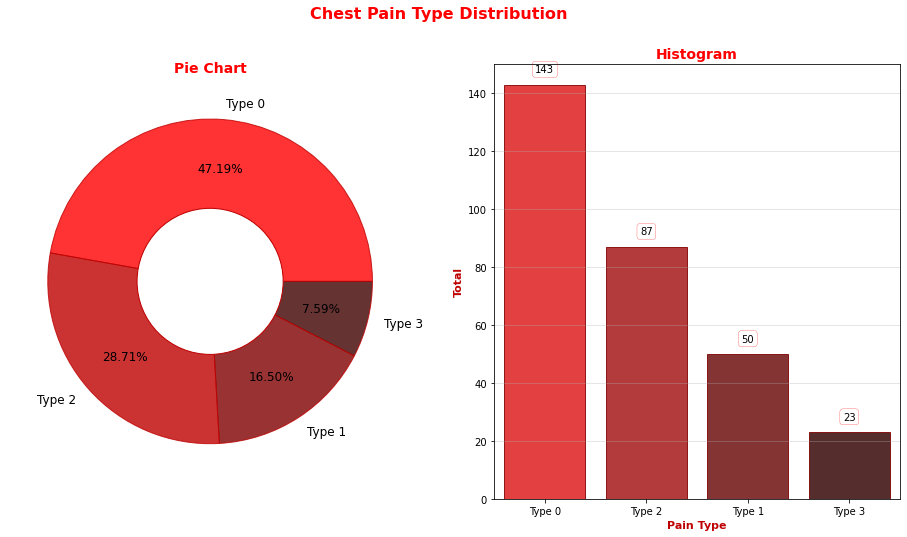

In [16]:
colors=red_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=heart['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=red_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=red_grad[0])
plt.pie(heart['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=red_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=red_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
ax = sns.countplot(x='cp', data=heart, palette=colors, order=order,
                   edgecolor=red_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=red_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
heart.cp.value_counts(dropna=False)

| Types | Chest Pain Type |	Criteria |
| --- | --- | --- |
| Type 0	 | Typical Angina  |	All criteria present |
| Type 1	 | Atypical Angina |	2 of 3 criteria present |
| Type 2  | Non Anginal Pain |	Less than one criteria present |
| Type 3	 | Asymptomatic | None of criteria are satisfied |

-Angina: Discomfort when enough blood or oxygen is not circulated

-Non Anginal Pain: Pain in the chest usually caused by digestive tract

-Asymptomatic: No symptoms

## Resting ElectroCardiogram Results (restecg)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


ST-T Wave Abnormality           152
Normal                          147
Left Ventricular Hypertrophy      4
Name: restecg, dtype: int64

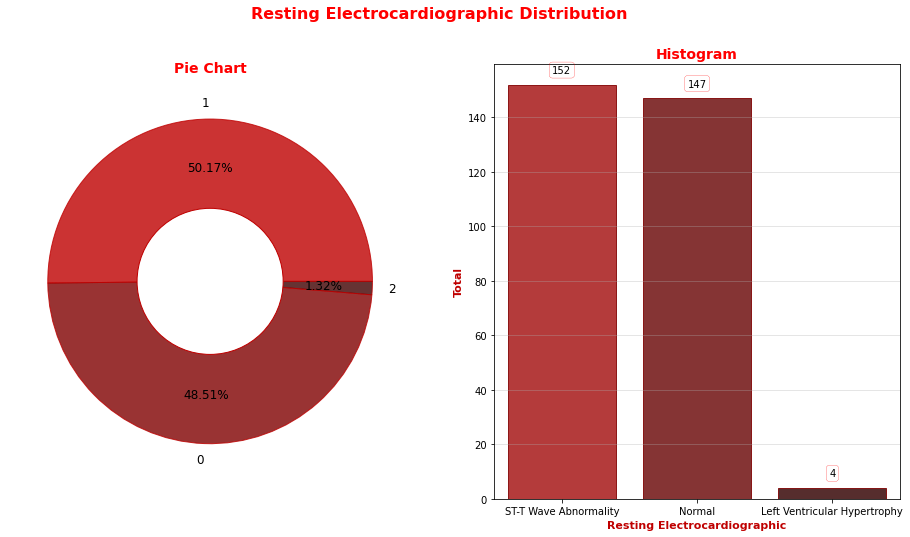

In [17]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:4]
labels=['1', '0', '2']
order=heart['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=red_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
plt.pie(heart['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=red_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=red_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
ax = sns.countplot(x='restecg', data=heart, palette=colors, order=order,
                   edgecolor=red_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=red_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=red_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
heart.restecg.value_counts(dropna=False)

| No. | Results |
| --- | --- |
| 0	  | Normal |
| 1   |	Having ST-T wave abnormality |
| 2	  | Showing probable or definite left ventricular hypertrophy by Estes' criteria |

Left Ventricular Hypertrophy: A heart's left pumping chamber has thickened and may not be pumping efficiently

ST-T wave abnormality: ST segment abnormality (elevation or depression) indicates myocardial ischaemia or infarction i.e. a heart attack

## Slope of peak exercise ST segment (slope)

********************
.: Slope Total :.
********************


Downsloping    142
Flat           140
Unsloping       21
Name: slope, dtype: int64

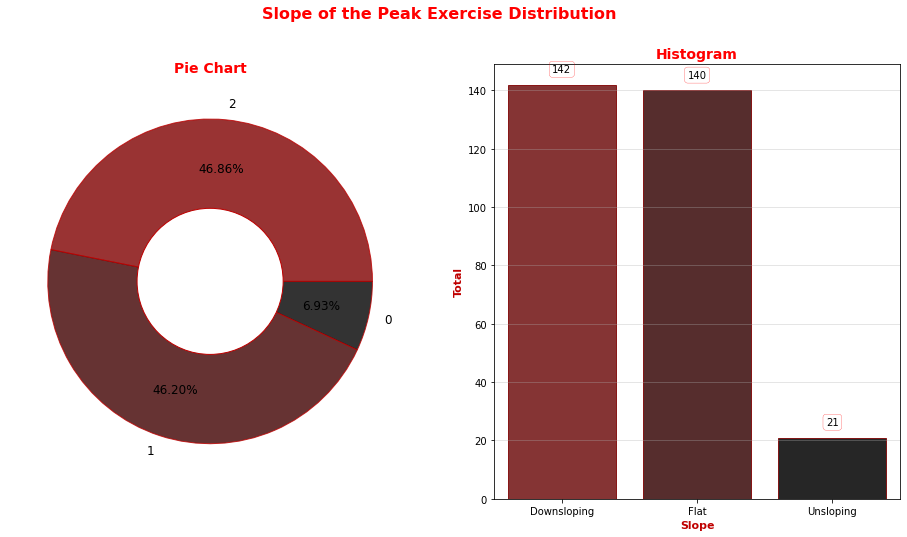

In [19]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[2:5]
labels=['2', '1', '0']
order=heart['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=red_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=red_grad[0])
plt.pie(heart['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=red_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=red_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
ax = sns.countplot(x='slope', data=heart, palette=colors, order=order,
                   edgecolor=red_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=red_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
heart.slope.value_counts(dropna=False)

| No. | Slope | 
| --- | --- | 
| 1 | Upsloping | 
| 2 | Flat | 
| 3 | Downsloping | 

Horizontal or downsloping ST depression ≥ 0.5 mm at the J-point in ≥ 2 contiguous leads indicates myocardial ischaemia or blockage or arteries which eventually leads to heart disease

## Thallium Stress Test

********************
.: "thal" Total :.
********************


Fixed Defect         166
Reversible Defect    117
Normal                18
0                      2
Name: thal, dtype: int64

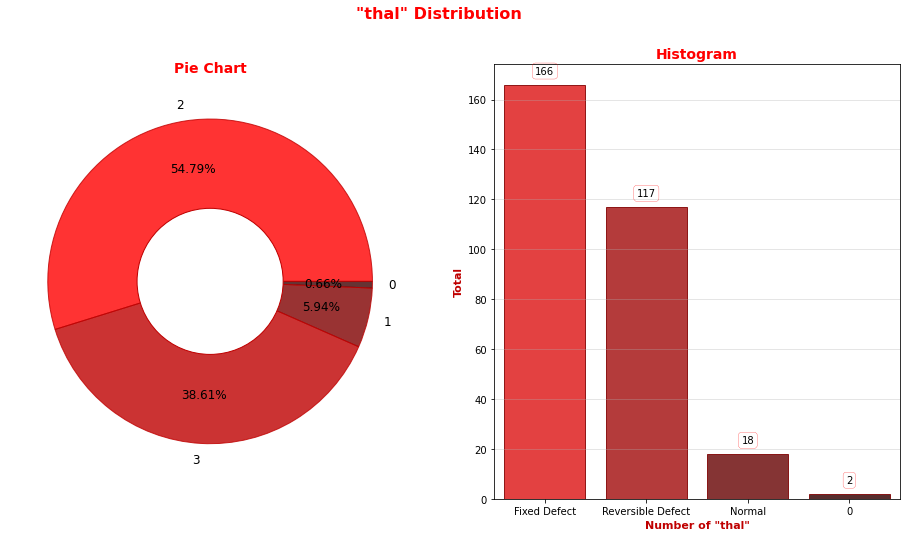

In [20]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=heart['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=red_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
plt.pie(heart['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=red_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=red_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=red_grad[0])
ax = sns.countplot(x='thal', data=heart, palette=colors, order=order,
                   edgecolor=red_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=red_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=red_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=red_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
heart.thal.value_counts(dropna=False)

| No. | Results | Meaning |
| --- | --- | --- |
| 0 | Normal | Passed Thallium Test and condition is normal |
| 1 | Fixed Defect | Heart tissue can't absorb thallium both under stress and in rest |
| 2 | Reversible Defect | Heart tissue is unable to absorb thallium only under the exercise portion of the test |

A thallium stress test is a nuclear medicine study that shows your physician how well blood flows through your heart muscle while you're exercising or at rest and you're basically screwed if the result is a fixed defect or reversible defect. Fixed defect being worse

In [21]:
print(heart["thal"].unique())

# replacing 0 - causes problems in pre processing
heart.loc[heart["thal"]==0,"thal"] = "Not taken the test"

['Normal' 'Fixed Defect' 'Reversible Defect' 0]


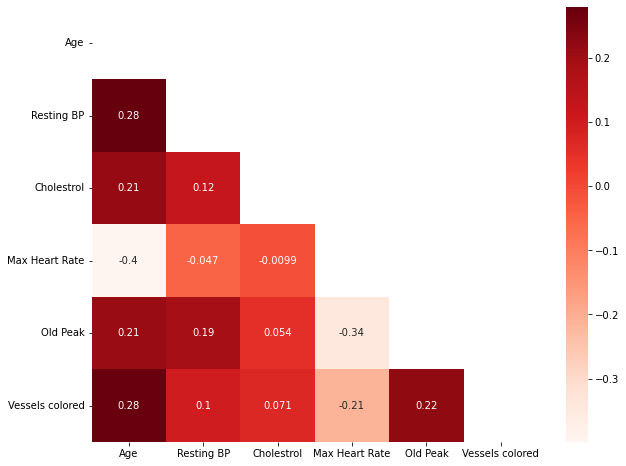

In [48]:
plt.figure(figsize=(10,8))

corr = heart.corr()

tick_labels = ["Age","Resting BP","Cholestrol","Max Heart Rate","Old Peak","Vessels colored"]

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
corr_heatmap = sns.heatmap(corr,
            annot=True, 
            mask=matrix, 
            cmap="Reds",
            xticklabels=tick_labels,
            yticklabels=tick_labels
           )
plt.yticks(rotation=0)
plt.show()

The correlation between age and blood pressure is almost strikingly same.

Age is positively correlated with almost all except heart rate. Increasing cholestrol, BP, Vessels colored from fluroscopy
Maximum Heart Rate achieved by patient is negatively correlated with old peak (exercise relative to rest) and vessels colored

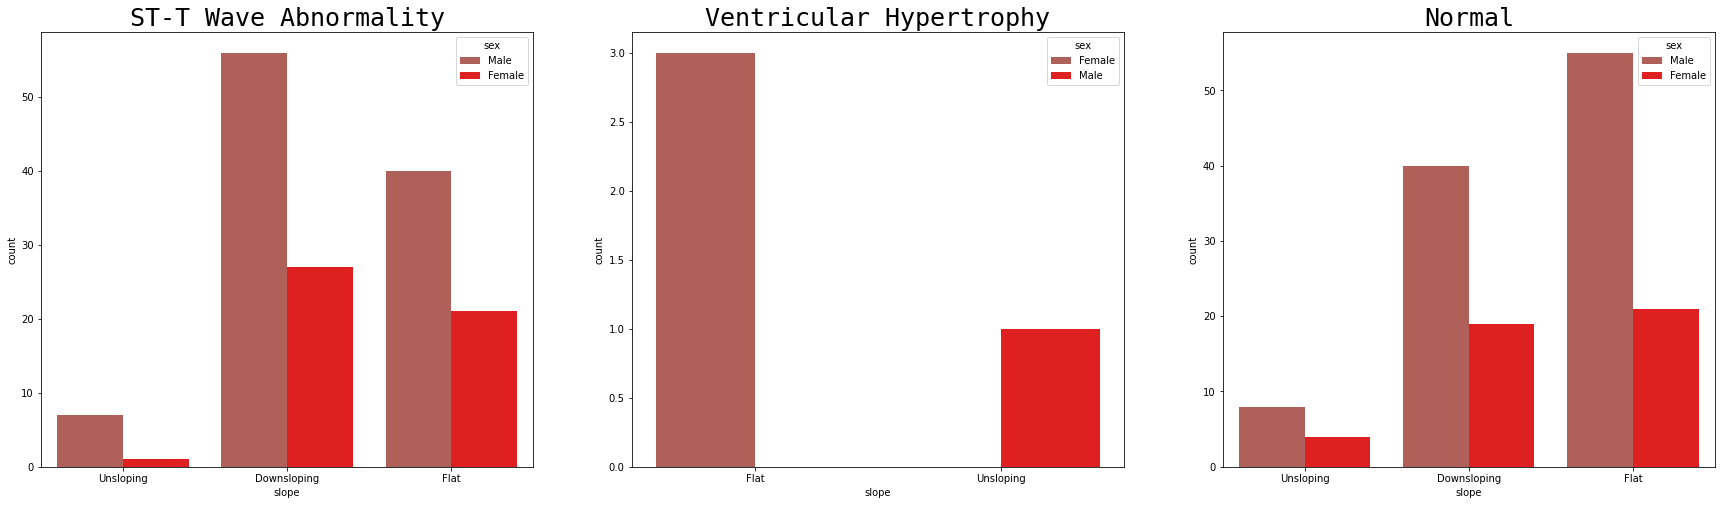

In [50]:
### ST-T slopes for various Rest ECG results

colors = ["#BC544B","#FF0000"]
title_style = {
    "fontname":"monospace",
    "fontsize":25
}
plt.figure(figsize=(30,8))

slopes_st_t = heart.loc[heart["restecg"]=="ST-T Wave Abnormality"]
slopes_ventricular = heart.loc[heart["restecg"]=="Left Ventricular Hypertrophy"] 
slopes_normal = heart.loc[heart["restecg"]=="Normal"]


plt.subplot(1,3,1)
plt.title("ST-T Wave Abnormality",fontdict=title_style)
sns.countplot(x="slope",hue="sex",data=slopes_st_t,palette=colors)

plt.subplot(1,3,2)
plt.title("Ventricular Hypertrophy",fontdict=title_style)
sns.countplot(x="slope",hue="sex",data=slopes_ventricular,palette=colors)

plt.subplot(1,3,3)
plt.title("Normal",fontdict=title_style)
sns.countplot(x="slope",hue="sex",data=slopes_normal,palette=colors)

plt.show()

Interestingly, there are no downsloping results when restecg results showed left ventricular hypertrophy. It is quite odd to note the fact that all of the patients having flat slope in ventricular hypertrophy are males and unsloping are females.

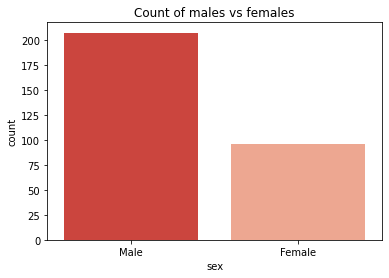

In [52]:
plt.title("Count of males vs females")
sns.countplot(x="sex",data=heart,palette="Reds_r")
plt.show()

As expected there are nearly 50 percent more males than females as patients.

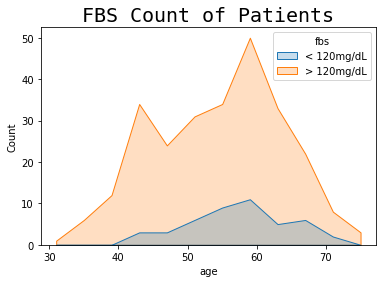

In [54]:
plt.title("FBS Count of Patients",fontdict={"fontname":"monospace","fontsize": 20})
sns.histplot(x="age",
             hue="fbs",
             data=heart,
             element="poly",
            )
plt.show()

Most of the patients admitted have fasting blood sugar levels more than 120mg/L which means they are most probably diabetic and also most of the patients lie in the age group of 50-65.

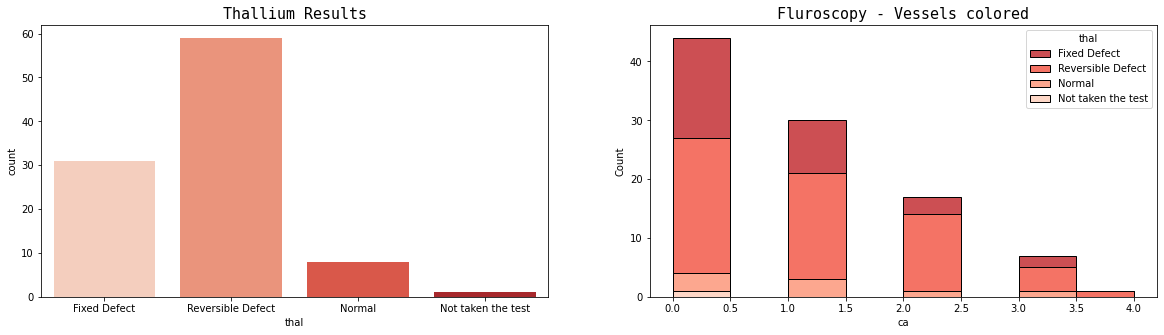

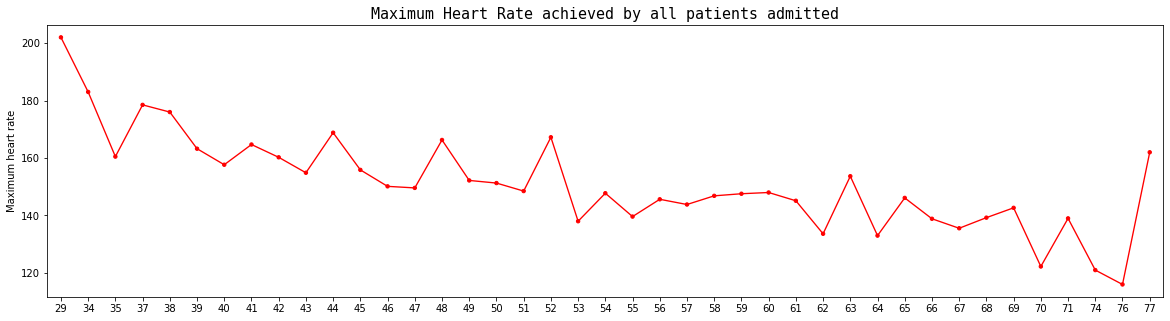

In [55]:
exercise_induced_angina = heart.loc[(heart["exang"]=="Yes") & (heart["thal"]!=0)]
age_unique=sorted(heart["age"].unique())

kwargs = dict(s=10)
plt.figure(figsize=(20,5))
# THALLIUM RESULTS
plt.subplot(1,2,1)
plt.title("Thallium Results",fontdict={"fontname":"monospace","fontsize":15})
sns.countplot(data=exercise_induced_angina,
              x="thal",
              palette="Reds"
             )

# FLUROSCOPY RESULTS
plt.subplot(1,2,2)
plt.title("Fluroscopy - Vessels colored",fontdict={"fontname":"monospace","fontsize":15})
sns.histplot(x="ca",hue="thal",data=exercise_induced_angina,palette="Reds_r",multiple="stack")
plt.show()


# MAX HEART RATE ACHIEVED
plt.figure(figsize=(20,5))
plt.title("Maximum Heart Rate achieved by all patients admitted",fontdict={"fontname":"monospace","fontsize":15})
plt.ylabel("Maximum heart rate")

# Calculating mean thalach else it would show blue patches of range
age_thalach_values=heart.groupby('age')['thalach'].count().values

mean_thalach = []
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(heart[heart['age']==age].thalach)/age_thalach_values[i])

sns.pointplot(x=age_unique,y=mean_thalach,markers=['o'],scale=0.5,color="red")

plt.show()

Most of the people who had exercise induced angina showed reversible defect in thallium test which is true as reversible defect is when heart tissue is unable to absorb thallium only under the exercise portion of the test, followed by fixed defect which means under stress and rest and very small percentage of patients got the result of normal

More vessels colored implies blood flow is proper and hence lesser count of admitted patients. Fixed defect thallium test is more visible in patients with number of colored vessels as 0

Average thalach (Maximum heart rate achieved) is decreasing with age 

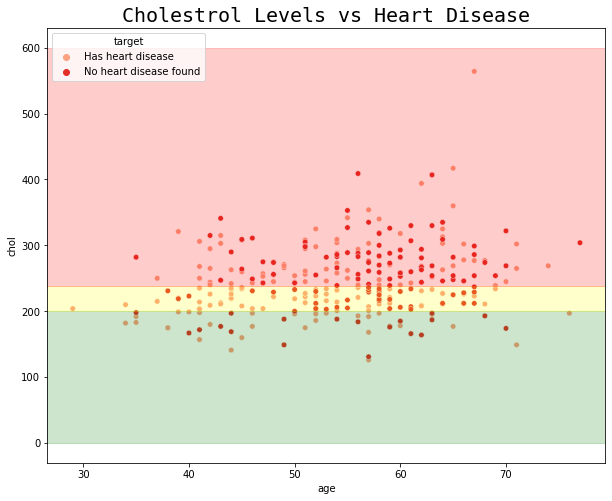

In [56]:
# Cholestrol is in mg/dl according to this data and also dataset hence we can check the range and determine heart disease or not
kwargs=dict(s=30)
fig, ax = plt.subplots(nrows=1,figsize=(10,8))
plt.title("Cholestrol Levels vs Heart Disease",fontdict={"fontname":"monospace","fontsize": 20})
sns.scatterplot(x="age",
            y="chol",
            hue="target",
            data=heart,
            palette="Reds",
            **kwargs)

ax.axhspan(0,200,alpha=0.2,color='green')
ax.axhspan(200,239,alpha=0.2,color='yellow')
ax.axhspan(239,600,alpha=0.2,color='red')

plt.show()

Most of the Patients having cholestrol above and equal to the ideal range were having more chances in suffering from heart disease. However, the patients having heart disease and vice versa is quite spread out.

Surprisingly, patients whose cholestrol level touched the mark of 400 still did not succumb to a heart disease. On the flip side, patients whose cholestrol levels were in the range of 160-180 fell to heart disease. The most concentrated age range for the possibility of having a heart disease is 41, 44, 51, 52 and 53

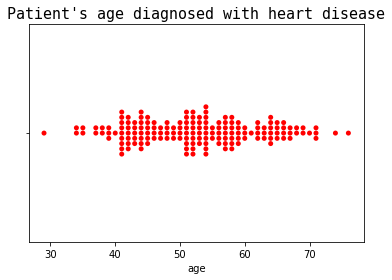

In [58]:
plt.title("Patient's age diagnosed with heart disease",fontdict={"fontname":"monospace","fontsize": 15})
have_heart_disease = heart.loc[heart["target"]=="Has heart disease"]
sns.swarmplot(x="age",data=have_heart_disease, color='red')
plt.show()

Heart diseases are unbiased to age. Affects everyone how generous

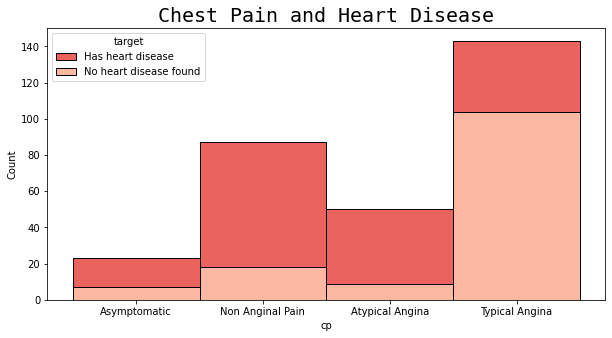

In [59]:
plt.figure(figsize=(10,5))
plt.title("Chest Pain and Heart Disease",fontdict={"fontname":"monospace","fontsize": 20})
sns.histplot(x="cp",
             data=heart,
             hue="target",
             multiple="stack",
             palette="Reds_r")
plt.show()

Most of the patients suffering non-anginal and atypical anginal chest pain have a higher risk of acquiring a heart disease. An equal proportion of people suffering from asymptomatic chest pain had a heart disease and most of the patients admitted having typical angina did not have a heart disease.

<a class="anchor" id="2."></a> 
# 2.Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 


In [30]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

C:\Users\Dell\AppData\Local\Temp/ipykernel_9880/1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['target'], 1))


In [31]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [32]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [33]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [34]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [35]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [36]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

<a class="anchor" id="3."></a> 
# 3.Building and Training the Neural Network

We can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [38]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 27ms/step - loss: 0.6920 - accuracy: 0.5868 - val_loss: 0.6870 - val_accuracy: 0.7377
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6767 - accuracy: 0.7273 - val_loss: 0.6708 - val_accuracy: 0.7705
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.7645 - val_loss: 0.6459 - val_accuracy: 0.7541
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6277 - accuracy: 0.7810 - val_loss: 0.6128 - val_accuracy: 0.7541
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.8223 - val_loss: 0.5738 - val_accuracy: 0.7705
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.8223 - val_loss: 0.5363 - val_accuracy: 0.7541
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4860 - accuracy: 0.8306 - val_loss: 0.5039 - val_accuracy: 0.7541
Epoch 8/50
25/25 [=

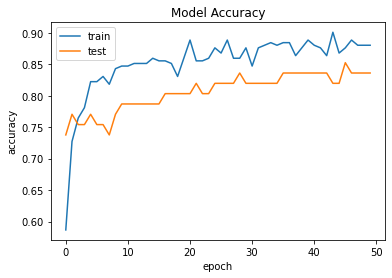

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

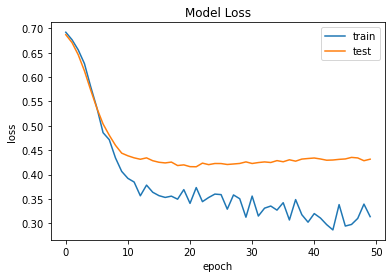

In [40]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="4."></a> 
# 4.Improving Results - A Binary Classification Problem

In [41]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [42]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 [==============================] - 2s 20ms/step - loss: 0.6872 - accuracy: 0.5455 - val_loss: 0.6743 - val_accuracy: 0.5410
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6608 - accuracy: 0.5661 - val_loss: 0.6463 - val_accuracy: 0.5410
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.6157 - val_loss: 0.6138 - val_accuracy: 0.6885
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5812 - accuracy: 0.7025 - val_loss: 0.5837 - val_accuracy: 0.7377
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5593 - accuracy: 0.7727 - val_loss: 0.5620 - val_accuracy: 0.7705
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5270 - accuracy: 0.8140 - val_loss: 0.5460 - val_accuracy: 0.8033
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.8140 - val_loss: 0.5337 - val_accuracy: 0.8033
Epoch 8/50
25/25 [=

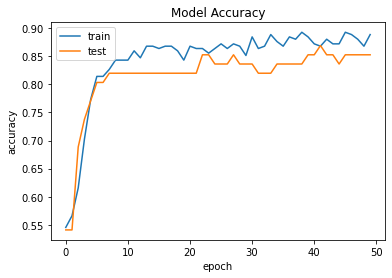

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

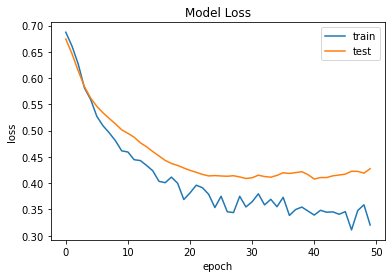

In [45]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="5."></a> 
# 5.Results and Metrics

In [46]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 0s/step
Results for Categorical Model
0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [47]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 0s/step
Results for Binary Model
0.8524590163934426
              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



# Conclusion

The binary model gives a better result than the categorical model